In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv("glass.data.txt", sep=',', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [30]:
data.shape

(214, 11)

In [31]:
#count phan loai
data.groupby(10).count()[0]

10
1    70
2    76
3    17
5    13
6     9
7    29
Name: 0, dtype: int64

In [68]:
features = data.drop([10], axis = 1)
features.tail()


,0,1,2,3,4,5,6,7,8,9
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0


In [43]:
target =  data[10]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 10, dtype: int64

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)


In [61]:
list_k = []
list_acc = []
list_score_train = []
list_score_test = []
list_d = [] #train - test
for K in range (2, 8):
    list_k.append(K)
    neigh = KNeighborsClassifier(n_neighbors= K )
    neigh = neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    list_acc.append(acc)
    train_score = neigh.score(X_train, y_train)
    test_score = neigh.score(X_test, y_test)
    list_score_train.append(train_score)
    list_score_test.append(test_score)
    d = abs(train_score - test_score)
    list_d.append(d)
    print("With K = %d, Accuracy is: %.2f" %(K,acc))

vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]

#vi_tri_d = list_score_train.index(min(list_acc))
#k_d = list_k[vi_tri_d]
#print("\nThe optimal number of neighbors is %d with %0.1f% %" %(k, list_acc[vi_tri] * 100))
#print(vi_tri_d)

With K = 2, Accuracy is: 0.98
With K = 3, Accuracy is: 0.98
With K = 4, Accuracy is: 0.98
With K = 5, Accuracy is: 0.98
With K = 6, Accuracy is: 0.98
With K = 7, Accuracy is: 1.00


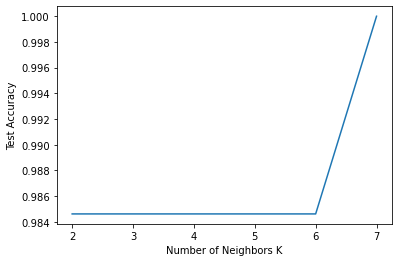

In [62]:
plt.plot(list_k, list_acc)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Test Accuracy")
plt.show()

In [63]:
#tao mo hinh knn voi k = 7
model = KNeighborsClassifier(n_neighbors= 7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [67]:
#do chinh xac
print("Score train accuracy: ", model.score(X_train, y_train))
print("Score test accuracy: ", model.score(X_test, y_test))

Score train accuracy:  0.9932885906040269
Score test accuracy:  1.0


In [72]:
x_now = [[216, 1.51618, 14.5, 2.3, 1.54, 72.99, 0.0, 8.78, 0.86,0.0]]
y_now = model.predict(x_now)
y_now

array([7], dtype=int64)